In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cte

# Theoretical Analysis

In [60]:
#Initial parameters
m = 0.255 * u.kg
R = (4.5 * u.cm).to(u.m)
l = (10 * u.cm).to(u.m)
L = (70 * u.cm).to(u.m)
I = ((3/5) * m * R**2) 
the = np.arctan(R/l)
phi = np.arctan((5*u.cm).to(u.m)/L)
psi = (15 * u.degree).to(u.rad)

In [4]:
#Validatin tangents condition and calculating equilibrium psi
if np.tan(phi) < np.tan(psi)*np.tan(the):
  print("The condition is accomplished")
else:
  print("The condition isn't accomplished, change initial parameters")

eq_psi = np.arctan(np.tan(phi)/np.tan(the))
print("The equilibrium psi angle is:", round(eq_psi.to(u.deg).value,2)*u.deg)

The condition is accomplished
The equilibrium psi angle is: 9.02 deg


In [13]:
#Calculatin height over time
#r = R-np.tan(the)*np.tan(psi)*x


# Importing Data

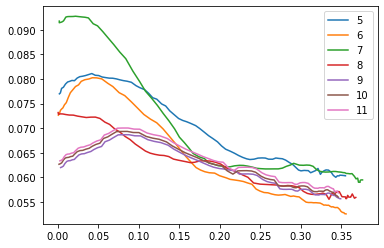

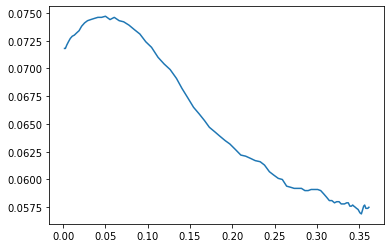

In [126]:
data_tot = pd.DataFrame()
data_prom = pd.DataFrame()
for i in range(1, 8, 1):
    data = pd.read_csv("../Data/30/" + str(i+4) + "new.csv", skiprows=1)
    data_tot["t_" + str(i)] = data.t
    data_tot["x_" + str(i)] = data.x
    data_tot["y_" + str(i)] = data.y
    data_tot["v_" + str(i)] = data.v
    data_tot["v_" + str(i)][0] = 0
    plt.plot(data.x[0:90],data.y[0:90], label=str(i+4))
    plt.legend()
    
data_tot.drop(range(89,len(data_tot),1), axis=0, inplace=True)

for i in ["t", "x", "y", "v"]:
    data_prom[i] = round(data_tot[[i+"_"+str(1),i+"_"+str(2),
                            i+"_"+str(3),i+"_"+str(4),
                            i+"_"+str(5),i+"_"+str(6),
                            i+"_"+str(7)]].mean(axis=1, skipna=True),4)
    
    
# data_prom.to_csv("data_prom_30.csv", sep=",", index=False)
plt.figure()
plt.plot(data_prom.x, data_prom.y)

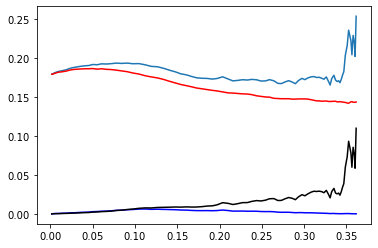

In [120]:
#Mechanical energy conservation
U = m*cte.g0*data_prom.y
Kt = 0.5*m*data_prom.v**2

def r(x):
    r = R.value - np.tan(the)*np.tan(psi)*x
    return r

Kr = 0.5*I*(data_prom.v/r(data_prom.x))**2

Em = U+Kt+Kr
plt.plot(data_prom.x,Em)
plt.plot(data_prom.x,U, "r")
plt.plot(data_prom.x,Kt, "b")
plt.plot(data_prom.x,Kr, "k")
# plt.plot(data_prom.x, np.full(len(data_prom.x),0))

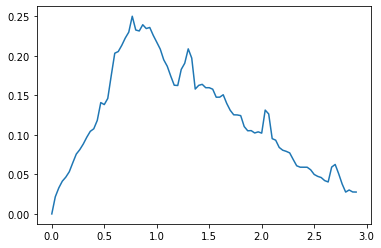

In [13]:
plt.plot(data.t, data.v)

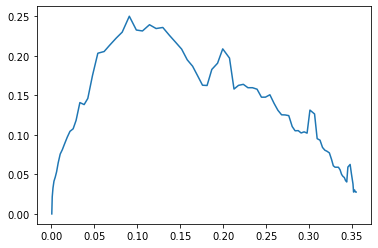

In [14]:
plt.plot(data.x,data.v)

# Theoretical Model


In [49]:
niu_k= 0.4

t_1 = np.linspace(0,2.4,50) * u.s
angle_1 = np.full(50,the)

In [50]:
def R(angle,times):
  X = 0.5*cte.g0*(np.sin(angle)-niu_k*np.cos(angle))*(times**2)
  
  return X

In [51]:
r_pos=R(angle_1, t_1)

In [52]:
x_pos=r_pos*np.cos(angle_1)
y_pos=r_pos*np.sin(angle_1)

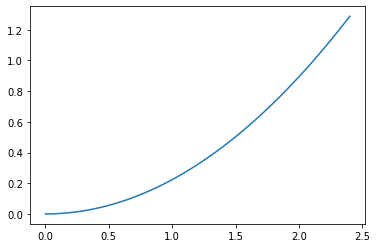

In [57]:
plt.plot(t_1,r_pos)

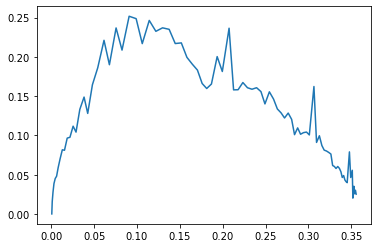

In [64]:
vx=np.array([0])
vy=np.array([0])
for i in range(1, len(data.x), 1):
    v = (data.x[i] - data.x[i-1])/(data.t[i] - data.t[i-1])
    vx = np.append(vx, [v])
for i in range(1, len(data.x), 1):
    v = (data.y[i] - data.y[i-1])/(data.t[i] - data.t[i-1])
    vy = np.append(vy, [v])
    
v = np.sqrt(vx**2 + vy**2)
plt.plot(data.x, v)

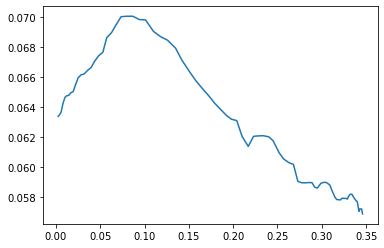

In [68]:
plt.plot(data.x,data.y)

In [109]:
# w = []
# for i in range(1, len(data.y),1):
#     # wi = np.sqrt(10*cte.g0.value*(data.y[i-1])/3*r(data.x[i-1])**2)
#     w.append(wi)

,t,x,y,v
0,0.0000,0.0016,0.0718,0.0000
1,0.0331,0.0026,0.0718,0.0399
2,0.0669,0.0042,0.0721,0.0557
3,0.1000,0.0062,0.0724,0.0642
4,0.1331,0.0084,0.0727,0.0677
...,...,...,...,...
84,2.8000,0.3566,0.0577,0.0394
85,2.8331,0.3580,0.0574,0.0431
86,2.8669,0.3596,0.0574,0.0360
87,2.9000,0.3603,0.0574,0.0303
